In [1]:
#!pip install -qU tavily-python langchain_community langchain_anthropic langgraph langchain_openai

In [ ]:
import os
os.environ["TAVILY_API_KEY"] = "tvly..."

from tavily import TavilyClient

tavily_client = TavilyClient()

In [3]:
response = tavily_client.search("What is AI agent?", max_results=3)
print(response)

{'query': 'What is AI agent?', 'follow_up_questions': None, 'answer': None, 'images': [], 'results': [{'title': 'What Are AI Agents? - IBM', 'url': 'https://www.ibm.com/think/topics/ai-agents', 'content': "# What are AI agents? ## What are AI agents? The agent's ability to store past interactions in memory and plan future actions encourages a personalized experience and comprehensive responses.1 This tool calling can be achieved without human intervention and broadens the possibilities for real-world applications of these AI systems. Given the user's goals and the agent’s available tools, the AI agent then performs task decomposition to improve performance.3 Essentially, the agent creates a plan of specific tasks and subtasks to accomplish the complex goal. In contrast, agentic AI chatbots learn to adapt to user expectations over time, providing a more personalized experience and comprehensive responses. AI agents are AI tools that can automate complex tasks that would otherwise requir

In [4]:
response['results']

[{'title': 'What Are AI Agents? - IBM',
  'url': 'https://www.ibm.com/think/topics/ai-agents',
  'content': "# What are AI agents? ## What are AI agents? The agent's ability to store past interactions in memory and plan future actions encourages a personalized experience and comprehensive responses.1 This tool calling can be achieved without human intervention and broadens the possibilities for real-world applications of these AI systems. Given the user's goals and the agent’s available tools, the AI agent then performs task decomposition to improve performance.3 Essentially, the agent creates a plan of specific tasks and subtasks to accomplish the complex goal. In contrast, agentic AI chatbots learn to adapt to user expectations over time, providing a more personalized experience and comprehensive responses. AI agents are AI tools that can automate complex tasks that would otherwise require human resources.",
  'score': 0.92091084,
  'raw_content': None},
 {'title': 'What is an AI age

In [5]:
context = tavily_client.get_search_context(query="What is AI agent?", )
print(context)

[{"url": "https://www.ibm.com/think/topics/ai-agents", "content": "# What are AI agents? ## What are AI agents? The agent's ability to store past interactions in memory and plan future actions encourages a personalized experience and comprehensive responses.1 This tool calling can be achieved without human intervention and broadens the possibilities for real-world applications of these AI systems. Given the user's goals and the agent\u2019s available tools, the AI agent then performs task decomposition to improve performance.3 Essentially, the agent creates a plan of specific tasks and subtasks to accomplish the complex goal. In contrast, agentic AI chatbots learn to adapt to user expectations over time, providing a more personalized experience and comprehensive responses. AI agents are AI tools that can automate complex tasks that would otherwise require human resources."}, {"url": "https://cloud.google.com/discover/what-are-ai-agents", "content": "AI agents can process multimodal inf

In [6]:
context

'[{"url": "https://www.ibm.com/think/topics/ai-agents", "content": "# What are AI agents? ## What are AI agents? The agent\'s ability to store past interactions in memory and plan future actions encourages a personalized experience and comprehensive responses.1 This tool calling can be achieved without human intervention and broadens the possibilities for real-world applications of these AI systems. Given the user\'s goals and the agent\\u2019s available tools, the AI agent then performs task decomposition to improve performance.3 Essentially, the agent creates a plan of specific tasks and subtasks to accomplish the complex goal. In contrast, agentic AI chatbots learn to adapt to user expectations over time, providing a more personalized experience and comprehensive responses. AI agents are AI tools that can automate complex tasks that would otherwise require human resources."}, {"url": "https://cloud.google.com/discover/what-are-ai-agents", "content": "AI agents can process multimodal

In [7]:
answer = tavily_client.qna_search(
    query="What is AI agent?",)
print(answer)

An AI agent is an autonomous system that performs tasks and makes decisions based on data. It operates independently and can adapt over time. AI agents automate processes and enhance efficiency.


## How to use Tavily Search as Tool in Langchain

In [8]:
from langchain_community.tools.tavily_search import TavilySearchResults

tool = TavilySearchResults(max_results=2)
tool.invoke("What is a 'node' in Langgraph?")

C:\Users\akrjs\AppData\Local\Temp\ipykernel_17988\2046832624.py:3: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tool = TavilySearchResults(max_results=2)


[{'title': 'Next LangGraph Glossary - Overview',
  'url': 'https://langchain-ai.github.io/langgraph/concepts/low_level/',
  'content': 'In LangGraph, nodes are typically python functions (sync or async) where the **first** positional argument is the [state](https://langchain-ai.github.io/langgraph/concepts/low_level/#state), and (optionally), the **second** positional argument is a "config", containing optional [configurable parameters](https://langchain-ai.github.io/langgraph/concepts/low_level/#configuration) (such as a `thread_id`). [...] 2.   [`Nodes`](https://langchain-ai.github.io/langgraph/concepts/low_level/#nodes): Python functions that encode the logic of your agents. They receive the current `State` as input, perform some computation or side-effect, and return an updated `State`.\n\n3.   [`Edges`](https://langchain-ai.github.io/langgraph/concepts/low_level/#edges): Python functions that determine which `Node` to execute next based on the current `State`. They can be conditio

## Binding tools

In [ ]:
os.environ["OPENAI_API_KEY"] = "sk-..."


from langchain_core.tools import tool
@tool
def add(a: int, b: int) -> int:
    """Adds a and b
    
    Args:
        a: first int
        b: second int"""
    return a + b

@tool
def multiply(a: int, b: int) -> int:
    """Multiplies a and b
    
    Args:
        a: first int
        b: second int"""
    return a * b

tools = [add, multiply]

from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o")
llm_with_tools = llm.bind_tools(tools)

query = "What is 3 * 12? Also, what is 11 + 49?"

llm_with_tools.invoke(query).tool_calls



[{'name': 'multiply',
  'args': {'a': 3, 'b': 12},
  'id': 'call_ZSBWh10FRMu9pOhILcmhhZoj',
  'type': 'tool_call'},
 {'name': 'add',
  'args': {'a': 11, 'b': 49},
  'id': 'call_muWBC8p5IjKWCgUn3rBaRTqv',
  'type': 'tool_call'}]

In [37]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o")
llm_with_tools = llm.bind_tools(tools)


In [38]:
query = "What is 3 * 12? Also, what is 11 + 49?"

llm_with_tools.invoke(query).tool_calls

[{'name': 'multiply',
  'args': {'a': 3, 'b': 12},
  'id': 'call_iTDBwmPLbEVCezDsWcYu1DIt',
  'type': 'tool_call'},
 {'name': 'add',
  'args': {'a': 11, 'b': 49},
  'id': 'call_77iKTleY8Vn8x2UEvBU1Rn06',
  'type': 'tool_call'}]

In [40]:
query = "What is 12 / 3?"
llm_with_tools.invoke(query).tool_calls

[]

## Apply to Tavily Search

In [41]:
from langchain_openai import ChatOpenAI

tool = TavilySearchResults(max_results=2)
tools = [tool]

llm = ChatOpenAI(model="gpt-4o")
llm_with_tools = llm.bind_tools(tools)

In [42]:
llm_with_tools.invoke("안녕")

AIMessage(content='안녕하세요! 무엇을 도와드릴까요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 81, 'total_tokens': 93, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_a288987b44', 'id': 'chatcmpl-BkYhGwbdWErPJW1ZLDKZoFA2jLpCI', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--7ed99d18-f813-4399-b58d-8b0e482f4eb6-0', usage_metadata={'input_tokens': 81, 'output_tokens': 12, 'total_tokens': 93, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

## Langgraph - Web search + LLM = 검색 Chatbot
 - Node - 실제 작업을 수행하는 단위
 

### chatbot

In [43]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)



### tools

In [44]:
import json
from langchain_core.messages import ToolMessage

class BasicToolNode:
    """
        A node that runs the tools requested in the last AIMessage.
        마지막 AIMessage에서 요청된 도구를 실행하는 노드
    """

    def __init__(self, tools: list) -> None:
        self.tools_by_name = {tool.name: tool for tool in tools} # ["tavily_search_results_json" : TavilySearchResults()]

    def __call__(self, inputs: dict):
        if messages := inputs.get("messages", []):
            message = messages[-1] # 마지막 message
        else:
            raise ValueError("No message found in input")
        outputs = []
        for tool_call in message.tool_calls: # 메시지에서 호출된 도구를 불러옴
            tool_result = self.tools_by_name[tool_call["name"]].invoke( # Tool 호출 실행
                tool_call["args"]
            )
            outputs.append( # Tool 호출 결과(ToolMessage) 추가
                ToolMessage(
                    content=json.dumps(tool_result),
                    name=tool_call["name"],
                    tool_call_id=tool_call["id"],
                )
            )
        return {"messages": outputs}

tool_node = BasicToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

### Edge - 노드 간의 연결 

 - 조건부 엣지, 라우팅

In [45]:
def route_tools(
    state: State,
):
    """
    Use in the conditional_edge to route to the ToolNode if the last message
    has tool calls. Otherwise, route to the end.
    """
    if isinstance(state, list):
        ai_message = state[-1]
    elif messages := state.get("messages", []):
        ai_message = messages[-1]
    else:
        raise ValueError(f"No messages found in input state to tool_edge: {state}")
    if hasattr(ai_message, "tool_calls") and len(ai_message.tool_calls) > 0: # if the last message has "tool_calls"
        return "tools"
    return END

# 조건부 엣지 연결
graph_builder.add_conditional_edges(
    "chatbot", # 시작 노드
    route_tools,
    {"tools": "tools", END: END}, # 반환값이 "tools" 면 "tools" 노드로, END 면 END로 이동
)

In [46]:
# 엣지 연결
graph_builder.add_edge("tools", "chatbot") # 도구가 호출될 때마다 챗봇으로 돌아가 다음 단계를 결정
graph_builder.add_edge(START, "chatbot")
graph = graph_builder.compile()

### 그래프 시각화

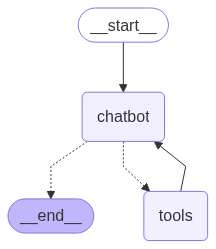

In [47]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

### 실행

In [48]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}): # graph 노드 호출 결과 받아옴
        for value in event.values():
            print("Assistant:", value["messages"][-1].content) # AI 답변 출력

In [49]:
while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

Assistant: 챗봇(Chatbot)은 인공지능(AI) 기술을 기반으로 하여 사람들이 자연어로 대화할 수 있게 만든 프로그램입니다. 주로 텍스트나 음성을 통해 사용자와 상호작용하며, 질문에 답하거나 정보를 제공하고, 특정 작업을 수행하는 등 다양한 기능을 제공합니다. 챗봇은 고객 서비스, 정보 제공, 예약 업무, 심리 상담 등 여러 분야에서 활용되고 있으며, 대화의 맥락을 이해하고 인간과 유사하게 반응하도록 설계되었습니다.
Goodbye!
